In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("emotion.data")
reddit=pd.read_csv("Reddit_Data.csv")
twr=pd.read_csv("Twitter_Data.csv")
print(len(data))

416809


In [3]:
reddit

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [4]:
data.head()

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


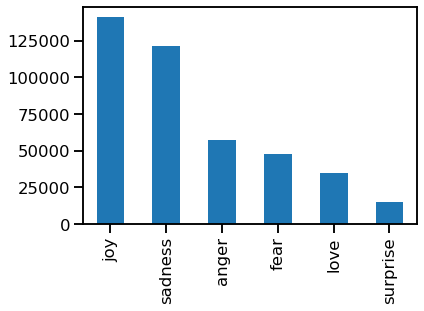

In [5]:
calls=pd.read_csv("Customercare_Calls_Report.csv")
data['emotions'].value_counts().plot.bar()
plt.show()


S.No                     0
cid                      0
updateddate              0
updatedby                0
calltype                 0
customertype           119
companyname           1802
gender                 404
customername           339
contactno                0
language               122
mailid                1801
state                  108
edition               1802
region                 108
area                   108
pincode                112
source                 108
offers                1653
enquiryfor             108
datacard              1802
dth                   1802
contest                119
callmode              1769
servicetype           1776
servicearea           1788
servicecenter         1801
name                  1497
imeino                1799
brand                  806
model                  811
dateofpurchase        1796
price                    0
showroom               558
plantopurchase           0
callstatus               0
outboundstatus         112
a

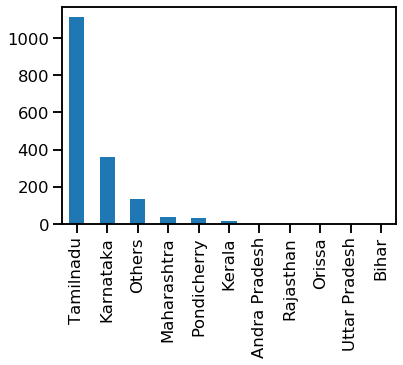

99110

In [6]:
print(calls.isnull().sum())
#data = data.drop(['Unnamed: 0'], axis=1)
X = data['text']
y = data['emotions']
calls['state'].value_counts().plot.bar()
plt.show()
calls["state"].value_counts()
calls.shape
calls.size


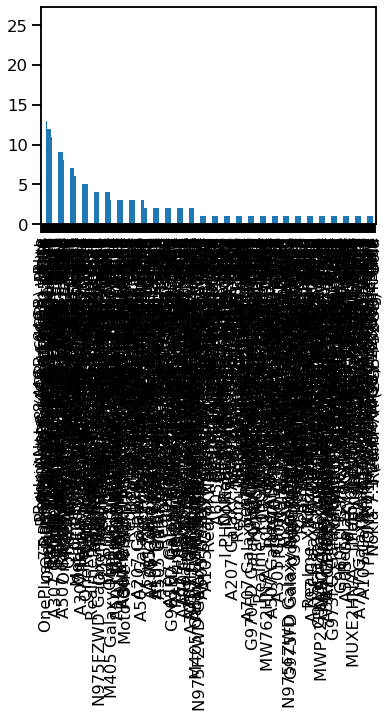

Redmi Note 8 (4GB+64GB) - Blue          26
Redmi Note 8 (4GB+64GB) - Black         25
Redmi Note 8 (4GB+64GB) - White         17
M30s                                    15
Realme 5S (4GB+128GB) - Blue            14
                                        ..
Z1 pro                                   1
A260 Galaxy A2 Core - Gold               1
F11 Pro (6GB+128GB) - Black              1
Nokia 7.1 (4GB+64GB) - Midnight Blue     1
Redmi 7A (2GB+32GB) - Gold               1
Name: model, Length: 363, dtype: int64

In [7]:
calls['model'].value_counts().plot.bar()
plt.show()
calls["model"].value_counts()

In [8]:
X

0         i feel awful about it too because it s my job ...
1                                     im alone i feel awful
2         ive probably mentioned this before but i reall...
3                  i was feeling a little low few days back
4         i beleive that i am much more sensitive to oth...
                                ...                        
416804    that was what i felt when i was finally accept...
416805    i take every day as it comes i m just focussin...
416806        i just suddenly feel that everything was fake
416807    im feeling more eager than ever to claw back w...
416808    i give you plenty of attention even when i fee...
Name: text, Length: 416809, dtype: object

In [9]:
y

0         sadness
1         sadness
2             joy
3         sadness
4            love
           ...   
416804        joy
416805       fear
416806    sadness
416807        joy
416808    sadness
Name: emotions, Length: 416809, dtype: object

In [10]:
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.10,random_state=42)

In [11]:
X_train

380657    i feel strongly about and i am convinced it is...
363775    i feel like sistas are looking for perfection ...
42951                           i feel like a proud grandma
99105     i couldn t help but start smiling and feeling ...
100297    i feel that i can answer in a completely un sa...
                                ...                        
259178    i feel like telling these horny devils to find...
365838    i began to realize that when i was feeling agi...
131932    i feel very curious be why previous early dawn...
146867    i feel that becuase of the tyranical nature of...
121958    i think that after i had spent some time inves...
Name: text, Length: 375128, dtype: object

In [12]:
X_test

36130         i just feel really helpless and heavy hearted
138065    ive enjoyed being able to slouch about relax a...
146440    i gave up my internship with the dmrg and am f...
103337                           i dont know i feel so lost
315528    i am a kindergarten teacher and i am thoroughl...
                                ...                        
332972    i feel triumphant and defeated all at oncecale...
60779                                i actually feel abused
44277     i don t feel sorrow for the town or even yell ...
228806    i call it mourning because i feel like i have ...
86769     i feel theres not a lot of time or explanation...
Name: text, Length: 41681, dtype: object

In [13]:
ytrain

380657         joy
363775         joy
42951          joy
99105          joy
100297       anger
            ...   
259178        love
365838       anger
131932    surprise
146867       anger
121958    surprise
Name: emotions, Length: 375128, dtype: object

In [14]:
ytest

36130        fear
138065    sadness
146440       fear
103337    sadness
315528       fear
           ...   
332972        joy
60779     sadness
44277     sadness
228806    sadness
86769        love
Name: emotions, Length: 41681, dtype: object

In [15]:
vectorizer = TfidfVectorizer( max_df= 0.9).fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(375128, 71553)


In [16]:
encoder = LabelEncoder().fit(ytrain)
y_train = encoder.transform(ytrain)
y_test = encoder.transform(ytest)

In [17]:
model = LogisticRegression(C=.1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy :  0.8988105393359067
Testing Accuracy  :  0.895084091072671


In [18]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train, y_train)
dc.score(X_test,y_test)
y_pred_train = dc.predict(X_train)
y_pred_test = dc.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.9516191806530038
Testing Accuracy  :  0.8346008972913318


In [18]:
from sklearn.en  import 
rf.fit(X_train, y_train)
rf.score(X_test,y_test)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

SyntaxError: invalid syntax (<ipython-input-18-d1713b2b1cae>, line 1)

In [19]:
def predict_(x, plot=False):
    tfidf = vectorizer.transform([x])
    preds = model.predict_proba(tfidf)[0]
    plt.figure(figsize=(8,4))
    sns.barplot(x= encoder.classes_, y=preds)
    plt.show()
    return preds

In [20]:
text="i dont hate football"

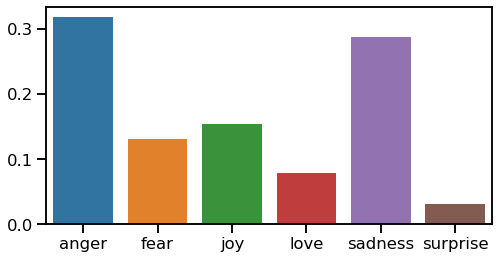

array([0.31810631, 0.13127423, 0.15436892, 0.07865196, 0.28703979,
       0.03055878])

In [21]:
predict_(text, plot=True)


In [34]:
import pickle
with open ("em.pickle","wb") as f:
    pickle.dump(model,f)

In [73]:
twr.isnull().sum()

clean_text    4
category      7
dtype: int64

In [53]:
tx=twr.clean_text
ty=twr.category

In [75]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(X_train, y_train)
sc.score(X_test,y_test)
y_pred_train = sc.predict(X_train)
y_pred_test = sc.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [77]:
tx=twr.clean_text
ty=twr.category
tx.isnull().any()
ty.isnull().sum()

0

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
a=cv.fit_transform(tx).toarray()

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [3]:
import smtplib 
server=smtplib.SMTP("smtp.gmail.com",587)
server.starttls()
server.login("subashpython1597@gmail.com","subash@1234")
msg="5676"
server.sendmail("subashpython1597@gmail.com","mvalivullah@gmail.com",msg)

{}

In [80]:
tx=tx.fillna("hi")

In [81]:
tx.isnull().sum()

0

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
a=cv.fit_transform(tx).toarray()

MemoryError: 